In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# need to update colab xlrd to read xls file
!pip install --upgrade xlrd

In [5]:
# use iris_dataset.xls
uploaded = files.upload()

Saving iris_dataset.xls to iris_dataset.xls


In [8]:
data = pd.read_excel(io.BytesIO(uploaded['iris_dataset.xls']))
print(data)

     sepal length  sepal width  petal length  petal width            iris
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [12]:
# independent variables
x = data.iloc[:,0:4].values
# dependent variables
y = data.iloc[:,4:].values

In [20]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33,
                                                    random_state=0)

# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Classifications:

In [21]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

y_prediction = logr.predict(X_test)
print("Prediction values:")
# print(y_prediction)
print("Real values:")
# print(y_test)

# eveluate success
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

Prediction values:
Real values:
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
# knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)
# print(y_prediction)
# print(y_test)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [77]:
# svm algorithm
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_prediction = svc.predict(X_test)
# print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_prediction = gnb.predict(X_test)
# print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')

dtc.fit(X_train, y_train)

y_prediction = dtc.predict(X_test)
# print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


In [74]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(X_train, y_train)

y_prediction = rfc.predict(X_test)
# print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
[0.  1.  0.  0.  0.  0.  0.  1.  0.8 1.  0.5 1.  1.  0.9 1.  0.  1.  1.
 0.  0.  0.1 1.  0.  0.  0.1 0.  0.  1.  0.9 0.  0.  0.9 0.  0.1 0.  0.8
 0.1 0.3 1.  1.  0.  0.  0.  0.  0.  0.9 0.  0.  0.7 0. ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


# to calculate ROC

In [94]:
y_proba = rfc.predict_proba(X_test)
print(y_proba[:,[0,1,2]])

print("**********")
# calculate ROC
from sklearn import metrics
fpr, tpr, thold = metrics.roc_curve(y_test, y_proba[:,0], pos_label='Iris-setosa')
print("--> False Positive Rate:")
print(fpr)
print("--> True Positive Rate:")
print(tpr)
print("--> Threshold:")
print(thold)

[[0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [0.  0.5 0.5]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.9 0.1]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.9 0.1]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.9 0.1]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [0.  0.  1. ]
 [0.  0.8 0.2]
 [0.9 0.1 0. ]
 [0.  0.3 0.7]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.7 0.3]
 [0.  0.  1. ]]
**********
--> False Positive Rate:
[0. 0. 0. 1.]
--> True Positive Rate:
[0.     0.9375 1.     1.    ]
--> Threshold:
[2.  1.  0.9 0. ]


# Visualize Data

[]

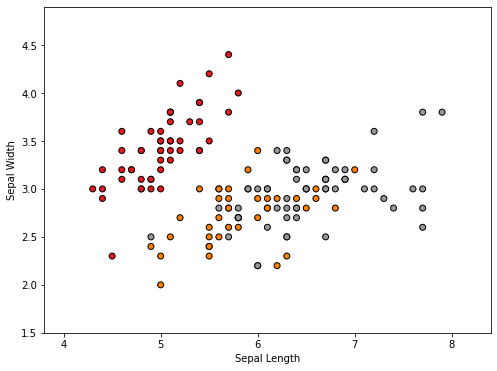

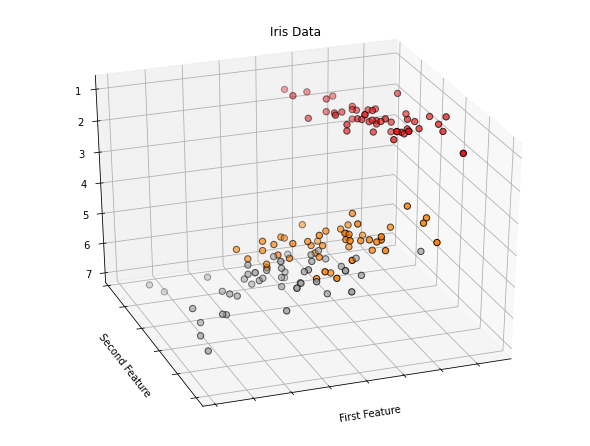

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()


# 3D visualization part:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev= -150, azim= 110)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris Data")
ax.set_xlabel("First Feature")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second Feature")
ax.w_yaxis.set_ticklabels([])